In [418]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [419]:
df = pd.read_csv('D:\InfernoPrediction\Weather\dataset.csv')

In [420]:
print("Data Types:", df.dtypes)

Data Types: dt                       int64
dt_iso                  object
timezone                 int64
city_name               object
lat                    float64
lon                    float64
temp                   float64
feels_like             float64
temp_min               float64
temp_max               float64
pressure               float64
sea_level              float64
grnd_level             float64
humidity                 int64
wind_speed             float64
wind_deg                 int64
rain_1h                float64
rain_3h                float64
snow_1h                float64
snow_3h                float64
clouds_all               int64
weather_id               int64
weather_main            object
weather_description     object
weather_icon            object
dtype: object


In [421]:
df['dt']=pd.to_datetime(df['dt'], unit='s')

In [422]:
df=df.set_index('dt',drop=False).resample('24h').mean()
df2=df.reset_index(level=0, inplace=True)
df

,dt,timezone,lat,lon,temp,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
0,2017-05-01,36000.0,-29.588744,152.332031,49.280000,44.964167,49.280000,49.280000,1021.770833,NaN,NaN,82.208333,5.173333,221.458333,NaN,NaN,NaN,NaN,68.083333,803.000000
1,2017-05-02,36000.0,-29.588744,152.332031,53.165000,48.962500,53.165000,53.165000,1021.112500,NaN,NaN,83.541667,6.785417,198.000000,NaN,NaN,NaN,NaN,47.375000,802.125000
2,2017-05-03,36000.0,-29.588744,152.332031,54.957500,48.617083,54.957500,54.957500,1025.050000,NaN,NaN,83.250000,11.287500,110.416667,0.474,NaN,NaN,NaN,81.583333,740.416667
3,2017-05-04,36000.0,-29.588744,152.332031,51.762500,44.232917,51.762500,51.762500,1029.116667,NaN,NaN,84.208333,12.173333,105.416667,0.410,NaN,NaN,NaN,69.833333,777.791667
4,2017-05-05,36000.0,-29.588744,152.332031,47.787500,40.579583,47.787500,47.787500,1029.587500,NaN,NaN,79.750000,9.292083,107.083333,NaN,NaN,NaN,NaN,32.916667,801.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2020-01-28,39600.0,-29.588744,152.332031,79.137083,85.348750,79.137083,79.137083,1011.500000,NaN,NaN,77.000000,2.856667,185.833333,NaN,NaN,NaN,NaN,11.375000,800.500000
1003,2020-01-29,39600.0,-29.588744,152.332031,81.332917,89.511250,81.332917,81.332917,1013.666667,NaN,NaN,79.208333,2.704583,123.375000,NaN,1.593077,NaN,NaN,35.875000,638.250000
1004,2020-01-30,39600.0,-29.588744,152.332031,79.306250,86.792500,79.306250,79.306250,1015.333333,NaN,NaN,78.750000,1.984167,130.958333,NaN,0.602500,NaN,NaN,31.250000,700.625000
1005,2020-01-31,39600.0,-29.588744,152.332031,77.540833,82.774583,77.540833,77.540833,1016.000000,NaN,NaN,75.291667,2.820833,128.375000,NaN,NaN,NaN,NaN,21.250000,801.125000


In [423]:
get_data = df['wind_speed']
get_data.index = df['dt']
get_data.head()

dt
2017-05-01     5.173333
2017-05-02     6.785417
2017-05-03    11.287500
2017-05-04    12.173333
2017-05-05     9.292083
Name: wind_speed, dtype: float64

In [424]:
def process_data(dataset, start, end, past_size,future_size):
  datas = []
  labels = []

  start = start + past_size
  if end is None:
    end = len(dataset) - future_size

  for i in range(start,end):
    indices = range(i-past_size, i)
    datas.append(np.reshape(dataset[indices], (past_size, 1)))
    labels.append(dataset[i+future_size])
  return np.array(datas), np.array(labels)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9EE5FA4A8>],
      dtype=object)

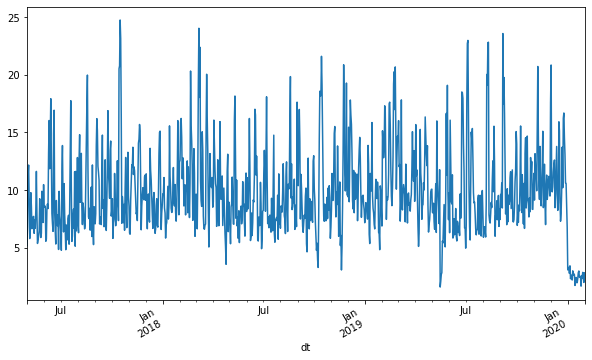

In [425]:
get_data.plot(subplots=True)

In [426]:
TRAININGSIZE = 700
get_data = get_data.values
get_train_mean = get_data[:TRAININGSIZE].mean()
get_train_standered = get_data[:TRAININGSIZE].std()

In [427]:
get_data = (get_data-get_train_mean)/get_train_standered

In [428]:
past_size =150
future_size =0

x_train, y_train = process_data(get_data, 0,TRAININGSIZE, past_size,future_size)

x_test, y_test = process_data(get_data,TRAININGSIZE, None,past_size,future_size)

In [429]:
print ('Past history')
print (x_train[0])
print ('\nWindSpeed To PRedict')
print (y_train[0])

Past history
[[-1.36539992]
 [-0.90438915]
 [ 0.38308083]
 [ 0.6364044 ]
 [-0.18755255]
 [-1.18905049]
 [-0.71767323]
 [-0.04897527]
 [-0.3903544 ]
 [-0.94418692]
 [-0.78714061]
 [-0.65916812]
 [-0.63807768]
 [-1.05857574]
 [-0.72970789]
 [-0.93024579]
 [-0.4759077 ]
 [ 0.47911978]
 [-0.57349566]
 [-1.30975452]
 [-1.22146065]
 [-1.1251834 ]
 [-0.99971316]
 [-0.20089792]
 [-0.91475563]
 [-1.16307469]
 [-1.0576225 ]
 [-0.01406285]
 [-0.3630679 ]
 [-0.79000033]
 [ 0.1508477 ]
 [-0.41156399]
 [-0.38177523]
 [-0.38463495]
 [-1.25565814]
 [-1.20215754]
 [-0.46470713]
 [-0.32851294]
 [-0.44337838]
 [ 0.93750914]
 [ 1.74228213]
 [ 0.54548912]
 [ 1.2785308 ]
 [ 2.28360339]
 [ 0.79309325]
 [-0.56050776]
 [-0.81156739]
 [-1.00960303]
 [ 1.41961034]
 [ 1.9979888 ]
 [-0.53905986]
 [-0.99780668]
 [-1.32417228]
 [-0.2433171 ]
 [-0.63760106]
 [-0.86959588]
 [-0.59792244]
 [-1.4586983 ]
 [-0.01585017]
 [-0.62365992]
 [-0.77129299]
 [-1.045707  ]
 [-1.47943127]
 [ 0.46827667]
 [ 1.12112702]
 [-0.2404573

In [430]:
def time_axis(length):
  return list(range(-length, 0))

In [431]:
def create_plot(data,delta,plot_title):
  plot_labels = ['Past Data', 'Acctual Future', 'Predcted Future']
  plot_markers = ['.-', 'rx', 'go']
  time_bar = time_axis(data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(plot_title)
  for i, x in enumerate(data):
    if i:
      plt.plot(future,data[i],plot_markers[i],markersize=12,
               label=plot_labels[i])
    else:
      plt.plot(time_bar,data[i].flatten(), plot_markers[i], label=plot_labels[i])
  plt.legend()
  plt.xlim([time_bar[0], (future+5)*2])
  plt.xlabel('Time')
  plt.ylabel('WindSpeed')
  return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\User\\Anaconda3\\envs\\yasas_env\\lib\\site-packages\\matplotlib\\pyplot.py'>

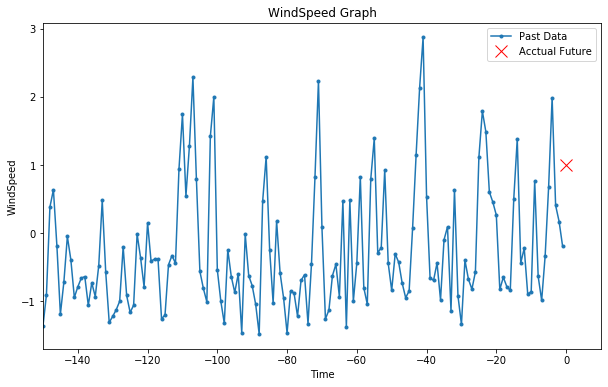

In [432]:
create_plot([x_train[0], y_train[0]], 0, 'WindSpeed Graph')

In [433]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

validation_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
validation_data = validation_data.batch(BATCH_SIZE).repeat()

In [434]:
WindSpeed_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(4, input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(1)
])

WindSpeed_model.compile(optimizer='adam', loss='mae')

In [435]:
for x, y in validation_data.take(1):
    print(WindSpeed_model.predict(x).shape)

(157, 1)


In [447]:
INTERVAL_TIME = 200
EPOCHS = 10

WindSpeed_history=WindSpeed_model.fit(train_data, epochs=EPOCHS,
                      steps_per_epoch=INTERVAL_TIME,
                      validation_data=validation_data, validation_steps=50)

Train for 200 steps, validate for 50 steps
Epoch 1/10
200/200 [==============================] - 27s 134ms/step - loss: 0.6095 - val_loss: 0.7980
Epoch 2/10
200/200 [==============================] - 27s 136ms/step - loss: 0.6068 - val_loss: 0.8051
Epoch 3/10
200/200 [==============================] - 30s 151ms/step - loss: 0.6111 - val_loss: 0.8077
Epoch 4/10
200/200 [==============================] - 32s 159ms/step - loss: 0.6041 - val_loss: 0.8111
Epoch 5/10
200/200 [==============================] - 31s 155ms/step - loss: 0.6031 - val_loss: 0.8113
Epoch 6/10
200/200 [==============================] - 31s 155ms/step - loss: 0.6081 - val_loss: 0.8105
Epoch 7/10
200/200 [==============================] - 28s 139ms/step - loss: 0.6041 - val_loss: 0.8133
Epoch 8/10
200/200 [==============================] - 29s 144ms/step - loss: 0.6005 - val_loss: 0.8117
Epoch 9/10
200/200 [==============================] - 29s 143ms/step - loss: 0.5925 - val_loss: 0.8079
Epoch 10/10
200/200 [=========

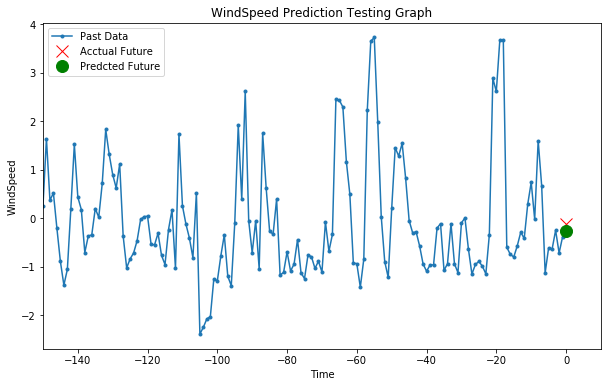

In [475]:
for x, y in validation_data.take(1):
  plot = create_plot([x[0].numpy(), y[0].numpy(),
                    WindSpeed_model.predict(x)[1]], 0, 'WindSpeed Prediction Testing Graph')
  plot.show()

In [479]:
def trainig_validation_loss(model_history, title):
  training_loss = model_history.history['loss']
  validation_loss = model_history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [480]:
# plot_train_history(WindSpeed_history,
#                     'Lstm Training and validation loss')

In [481]:
final_loss = WindSpeed_model.evaluate(x_test,y_test,verbose=2)

180/180 - 0s - loss: 0.6583


In [452]:
WindSpeed_model.save('WindSpeedPrediction.h5') 

In [453]:
predict_data = df['wind_speed']
predict_data.index = df['dt']
predict_data.head()
OUTPUT_SPLIT = 677
predict_data = predict_data.values
predict_train_mean = predict_data[OUTPUT_SPLIT:].mean()
predict_train_std = predict_data[OUTPUT_SPLIT:].std()

In [454]:
predict_data = (predict_data[OUTPUT_SPLIT:]-predict_train_mean)/predict_train_std

In [476]:
len(predict_data)

330

In [477]:
x_test, y_test = process_data(predict_data,0,330,
                                       150,
                                       future_size)

x=WindSpeed_model.predict(x_test)
len(x)

180

In [478]:
denormalized=[]
for i in y_test:
    denormalized.append(i*predict_train_std+predict_train_mean)
denormalized

[5.924583333333335,
 8.754583333333333,
 20.03875,
 19.09666666666667,
 22.79625,
 22.834166666666658,
 7.847916666666666,
 7.336249999999999,
 7.140416666666664,
 7.9412499999999975,
 8.931249999999999,
 8.482499999999996,
 10.943333333333333,
 12.536250000000004,
 9.861666666666666,
 15.545416666666668,
 12.295833333333333,
 5.995,
 7.816250000000001,
 7.717916666666667,
 9.068333333333333,
 7.427083333333332,
 8.59958333333333,
 9.534583333333332,
 6.847083333333331,
 8.349166666666667,
 7.445416666666667,
 9.624583333333335,
 9.433333333333335,
 10.617083333333333,
 8.447916666666663,
 23.59041666666667,
 17.46833333333334,
 19.77791666666667,
 16.635000000000005,
 11.929166666666665,
 7.929999999999999,
 9.964583333333334,
 6.995833333333331,
 10.121250000000003,
 7.243333333333335,
 9.55375,
 8.754166666666666,
 9.012083333333335,
 11.053749999999999,
 11.595416666666667,
 8.39958333333333,
 10.127083333333333,
 11.751666666666667,
 7.306666666666664,
 7.231666666666665,
 7.42874

In [458]:
denormalized=[]
for i in x:
    denormalized.append(i*predict_train_std+predict_train_mean)
denormalized

[array([7.476958], dtype=float32),
 array([7.3193374], dtype=float32),
 array([8.638948], dtype=float32),
 array([16.61621], dtype=float32),
 array([14.931901], dtype=float32),
 array([17.642197], dtype=float32),
 array([17.647419], dtype=float32),
 array([10.025958], dtype=float32),
 array([8.004859], dtype=float32),
 array([7.9186215], dtype=float32),
 array([8.149566], dtype=float32),
 array([8.452414], dtype=float32),
 array([8.0598955], dtype=float32),
 array([9.715896], dtype=float32),
 array([10.197609], dtype=float32),
 array([8.209186], dtype=float32),
 array([13.832041], dtype=float32),
 array([8.812271], dtype=float32),
 array([7.4138556], dtype=float32),
 array([8.515993], dtype=float32),
 array([7.8944383], dtype=float32),
 array([8.73889], dtype=float32),
 array([7.5876756], dtype=float32),
 array([8.5848255], dtype=float32),
 array([8.603826], dtype=float32),
 array([7.357231], dtype=float32),
 array([8.535912], dtype=float32),
 array([7.5841537], dtype=float32),
 array(

In [459]:
f = open("windSpeed.txt", "a")

for i in range(len(denormalized)):
    
    f.write(str(denormalized[i][0]))
    f.write("\n")
            
f.close()
f = open("windSpeed.txt", "r")
print(f.read())

7.476958
7.3193374
8.638948
16.61621
14.931901
17.642197
17.647419
10.025958
8.004859
7.9186215
8.149566
8.452414
8.0598955
9.715896
10.197609
8.209186
13.832041
8.812271
7.4138556
8.515993
7.8944383
8.73889
7.5876756
8.5848255
8.603826
7.357231
8.535912
7.5841537
9.089232
8.2710495
9.362
7.7221
17.31144
13.137523
16.04538
12.205763
8.867489
8.229231
9.376528
7.5704656
9.730545
7.444791
9.380034
8.07053
8.705942
9.629815
9.62408
7.901927
9.48383
9.833521
7.4530683
8.224528
7.907792
8.55046
9.445147
9.693127
12.793809
10.5271845
7.3836703
8.6928625
7.717391
8.718795
7.9908643
9.762814
13.248582
7.8249674
8.463403
10.0409355
8.247324
7.8154764
9.811592
7.125021
12.333756
11.234583
7.5849304
9.247951
12.625633
7.688034
8.986093
7.857743
9.043565
7.9127207
11.513451
8.782953
10.769032
7.688551
8.720392
9.220257
9.7555065
8.257143
11.65645
9.172031
9.745149
8.837721
13.025017
16.44254
10.997839
8.848066
9.189896
11.632266
8.932006
9.0206175
9.552563
10.377925
12.293835
9.038256
9.020571
10.